# Tasca M1 T01
## Exercicis amb MySQL.


### Objectius

- Construir diagrames entitat-relació i relacionals.
- Construir una base de dades relacional senzilla amb MySQL.
- Realitzar consultes senzilles.
- Realitza operacions la base de dades MySQL.

### Sources
- Entity-Relationship Diagram (ERD) freeware Tool: https://erdplus.com/


- Python and MYSQL Database: A practical introduction: https://realpython.com/python-mysql/


- Hollywood lineages: https://www.vanityfair.com/hollywood/2017/09/hollywood-family-legacies 


- Github Repository: https://github.com/MacMotx/Base-de-dades

### Imports

In [1]:
from getpass import getpass
import mysql.connector
from mysql.connector import connect, errorcode
import pandas as pd

# Exercici 1

A partir dels documents adjunts (estructura i dades), crea una base de dades amb MySQL. Mostra les característiques principals de l'esquema creat i explica les diferents taules i variables que hi ha.

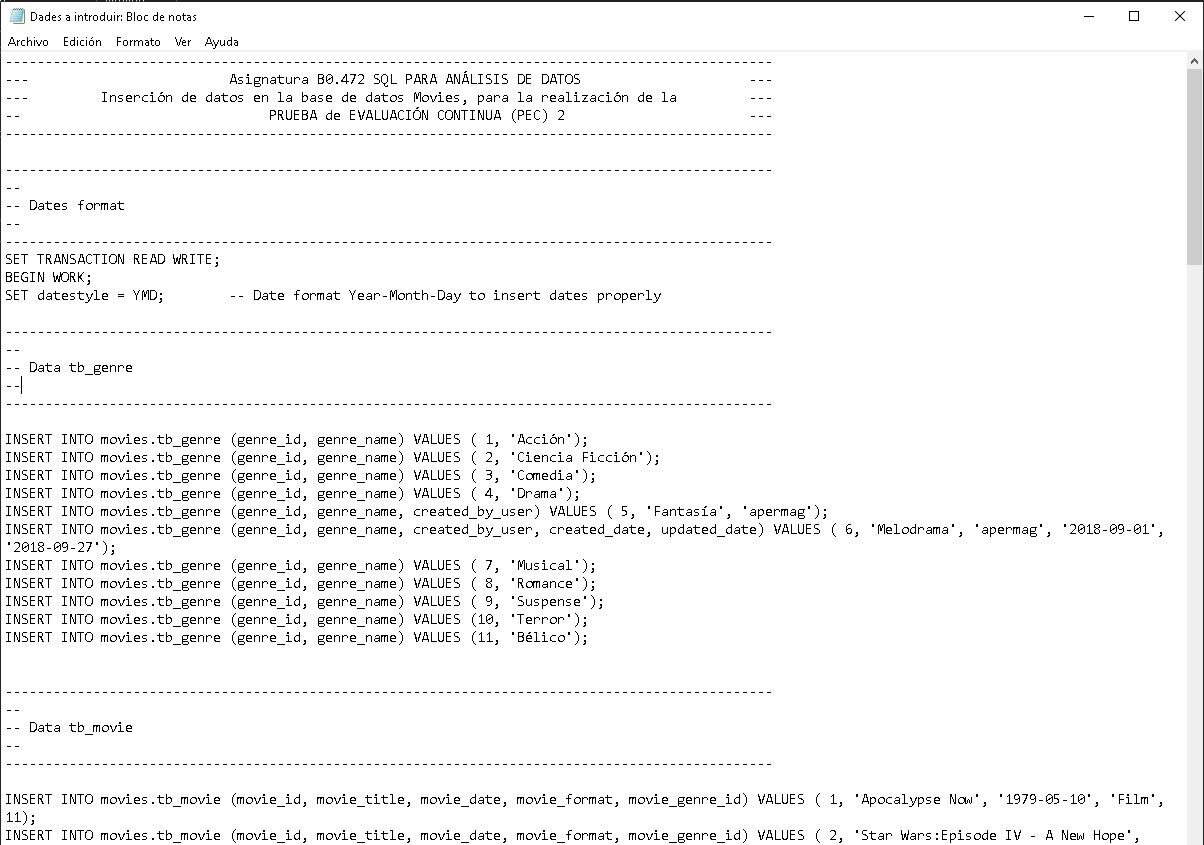

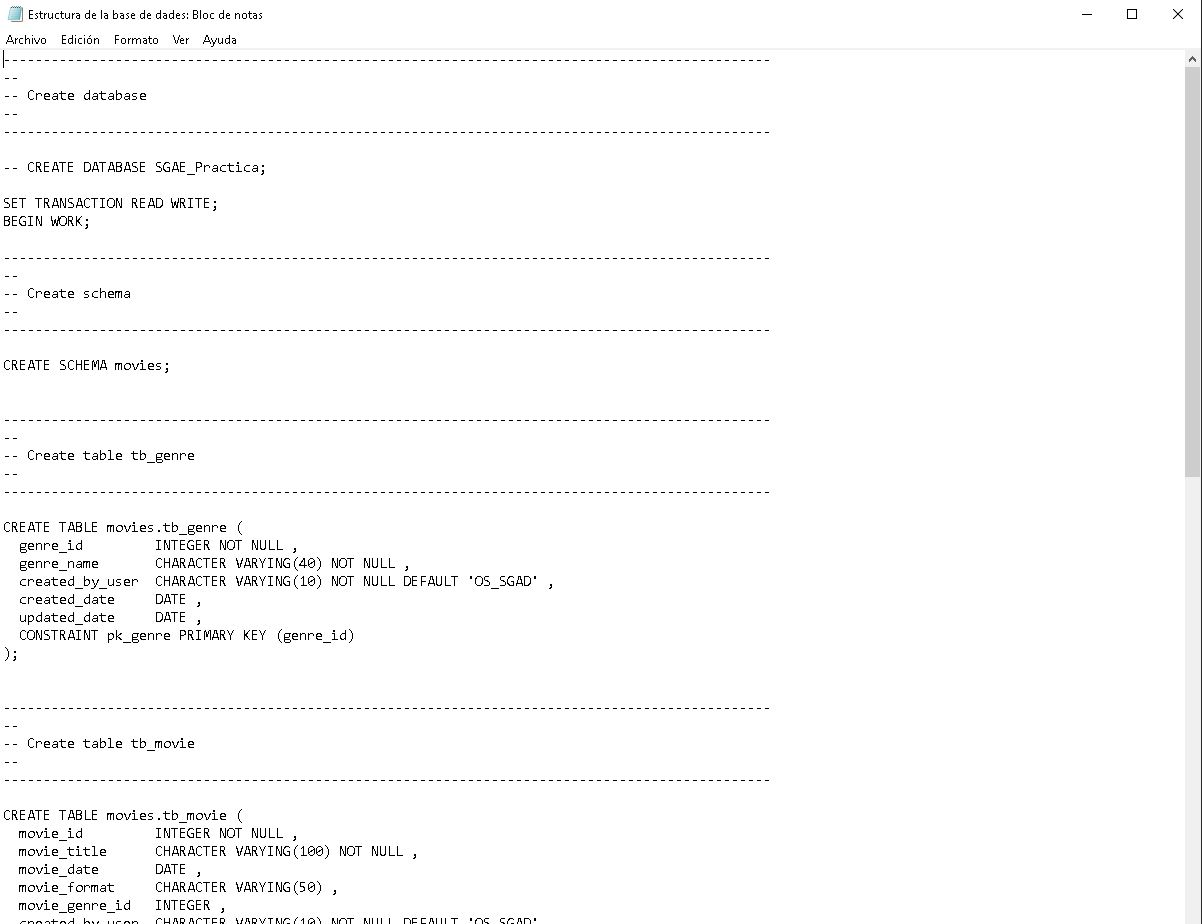

>Just by reading the provided .txt documents, we can spot that the data text file is a script only related to insert data, whereas the structure text file shows the script to create a db consisting of five tables containing movie related atributes as shown in the following schema;

- Genre: 
    - Genre_id: Unique Id number for each genre
    - genre_name: Eleven types of movie genres (e.g Comedy, Romance)


- Movie: 
    - movie_id : Unique Id number for each movie
    - movie_title: Multivaluate atributte (*titles can repeat*)
    - movie_date: Date of film's premiere 
    - movie_format: Available formats are Digital or Film.
    - genre_id : Foreign key pointed to genres Table. 


- Movie_person:
    - movie_id: Foreign key pointed to Movie Table.       
    - person_id: Foreign key pointed to Person Table.       
    - role_id: Foreign key pointed to Genre Table.         
    - movie_award_ind: Binary column (Y/N) telling if that particular role on the movie was awarded by the American Academy of motion picture arts & sciences (a.k.a. the Oscars).
    
    
- Person:
    - person_id: Unique Id number for each person.       
    - person_name: Name 
    - person_country: Country
    - person_dob: Date of birth
    - person_dod: Date of death
    - person_parent_id: Provides person_id of any parent if they happen to be in the same database.(**Basically acts as a foreign-key within the same table)


- Role:
    - role_id: Unique Id number for various roles in a movie a person can do.
    - role_name: Five distinct types of roles in a movie, namely; 
        - actor
        - director
        - producer
        - writter
        - soundtrack composer
        
>At first, we can tell the weakest entity is 'movie_person' since most of the other entities expand it's insights, as a juntion table  and has no primary key. 

>On the other hand, 'person' and 'movie'  are the most independent entities.


>Simplified Relationships in the ERDiagram serve the purpose of being fully abstractive, just for the notorious educational reasons to my own person and the reader.  


>Finally, a remark note for 'parent_id' wich presents what it's called "Unary Relationship" (\*parentive relationship in this case). Meaning it's a type of attribute linked to the primary key within the same table, acting sort of as a recursive foreign key. (e.g. Parent and son both are independent entities, thus having each a unique 'person_id' if they're present in the same table. But since all people included in this database is related to film-bussiness-industry, this necessarily implies a "cinematographic lineage" like the ones of the Douglas, Huston, Warner or Coppola, to name a few).

___
Entity-Relation Diagram based on the data in the provided file, ("Estructura de la base de dades.txt") using ERDPlus freeware.

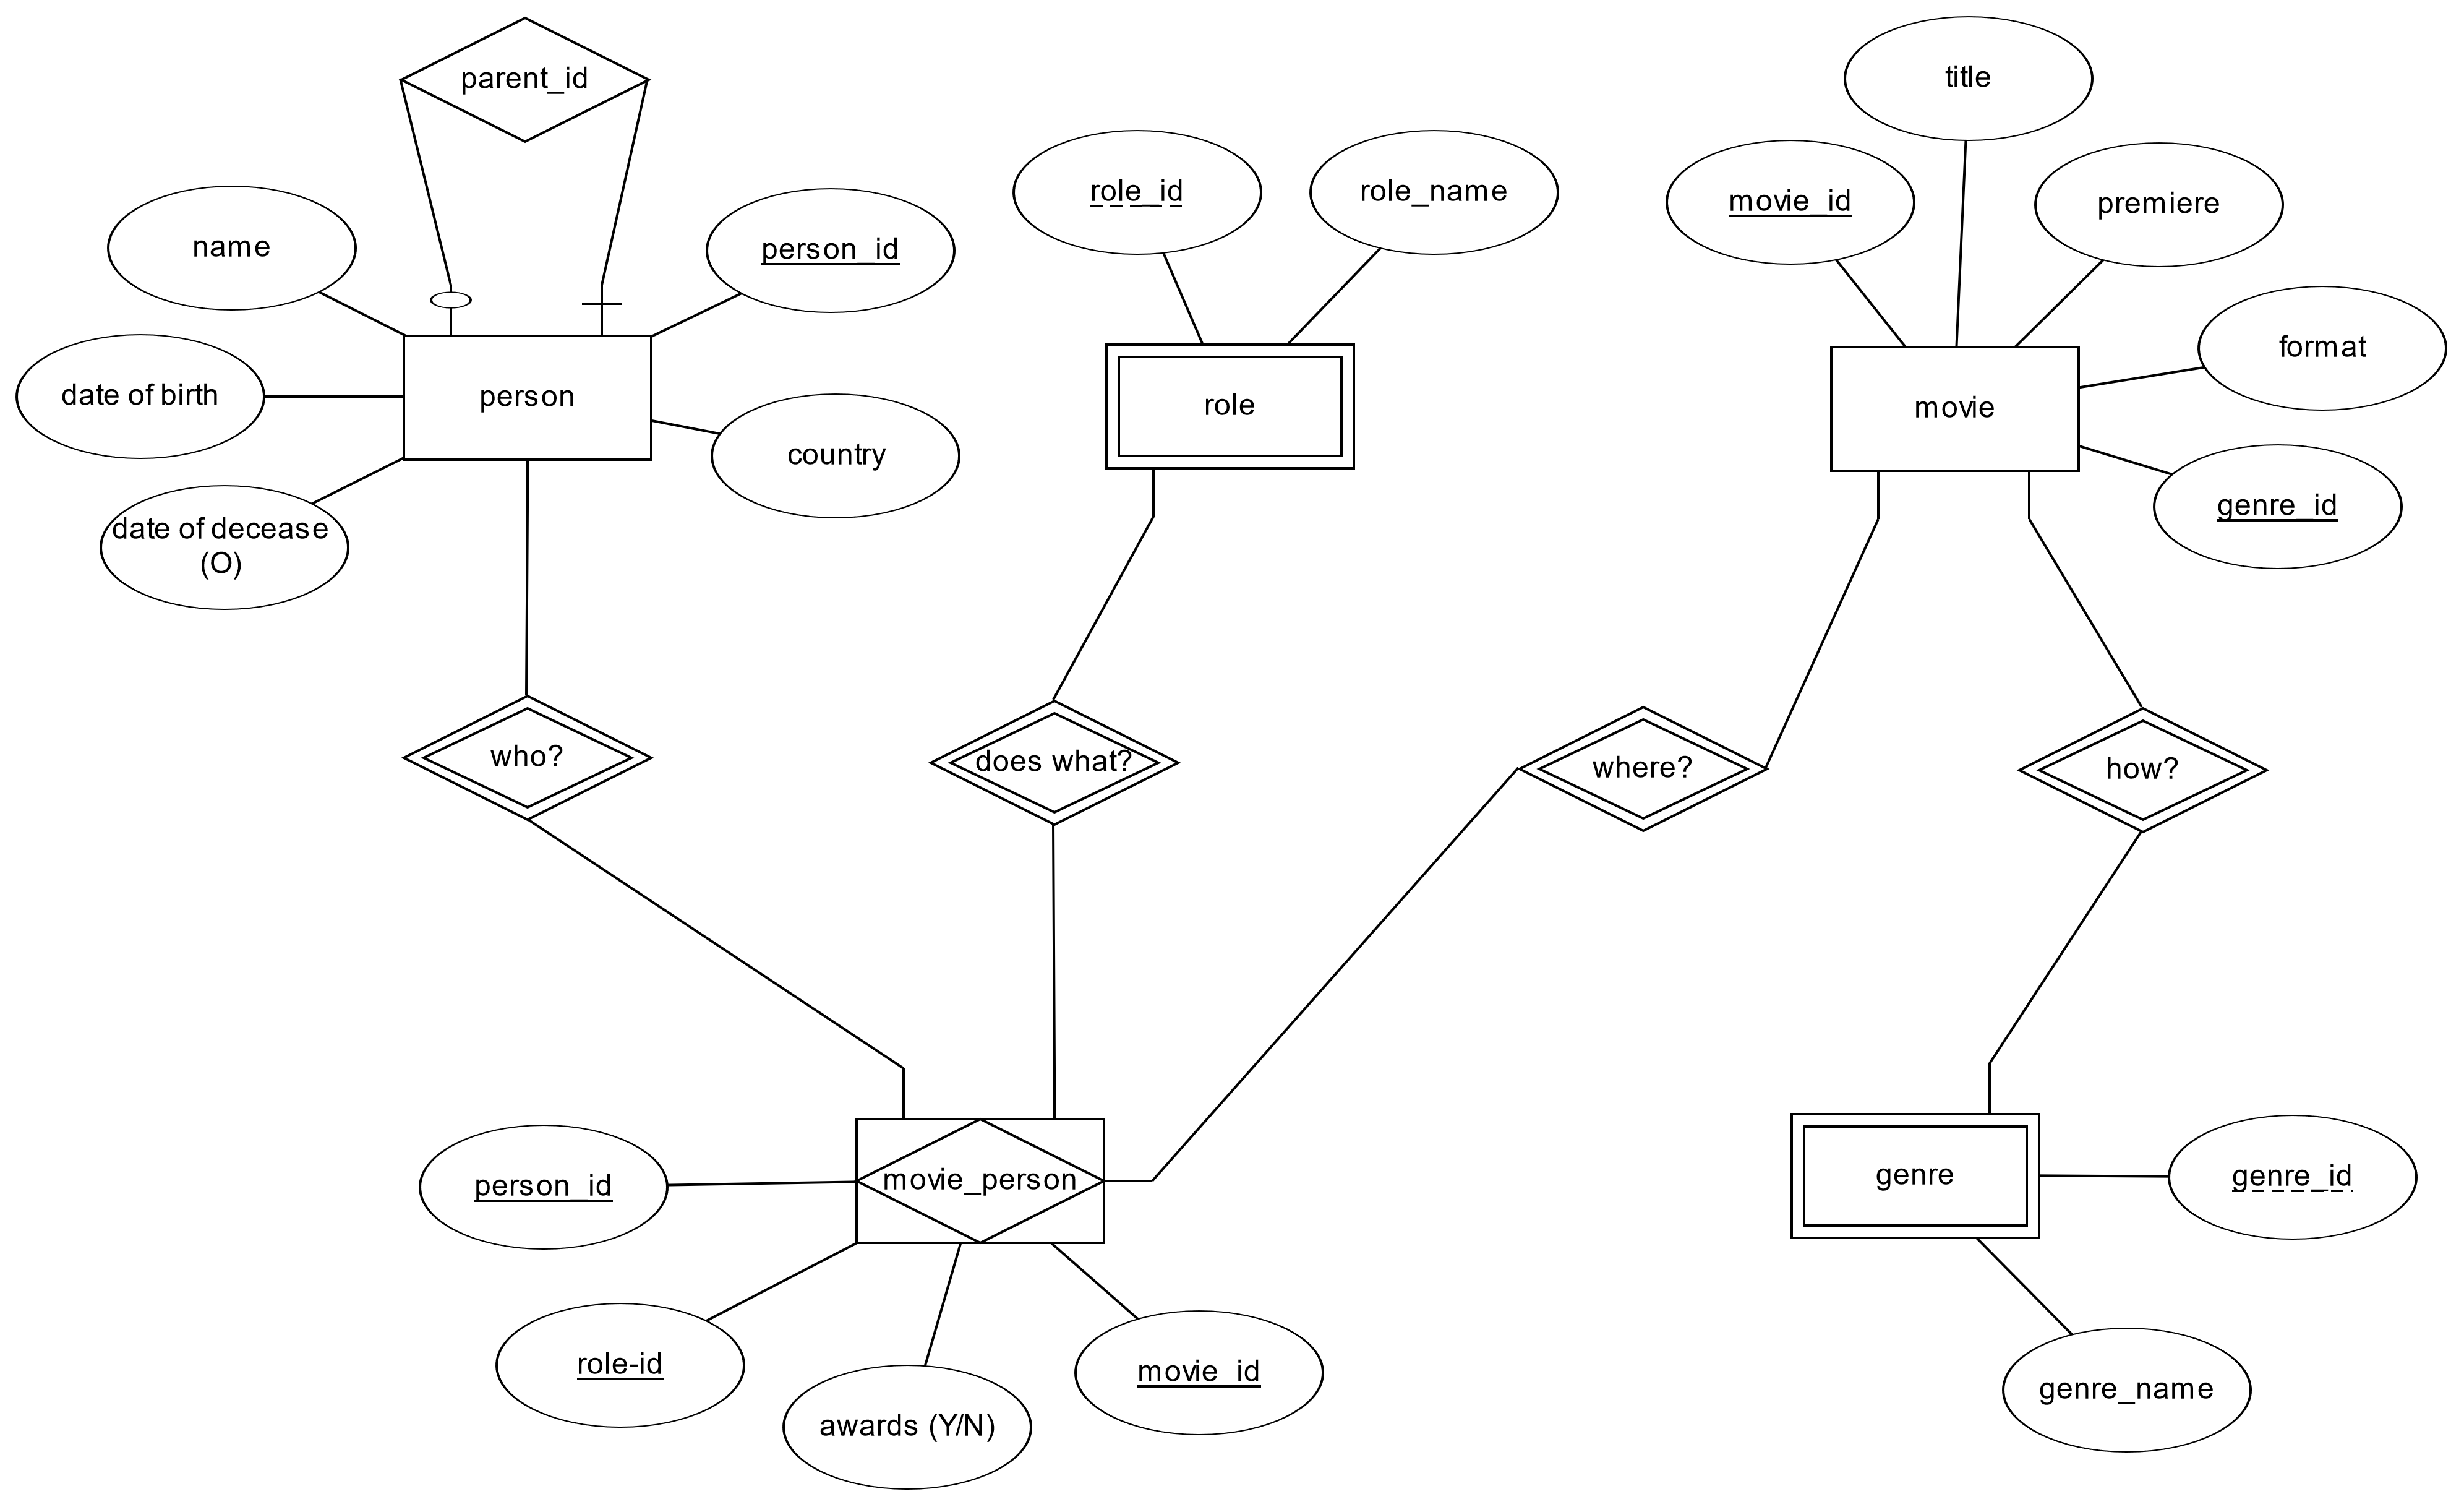

---
Schema after applying Reverse-Engineering technique based on the given text file, ("Estructura de la base de dades.txt") as if it was a script. 

\**Colors are mine, just trying to represent the simpliest of relationships in an intuitive way.*

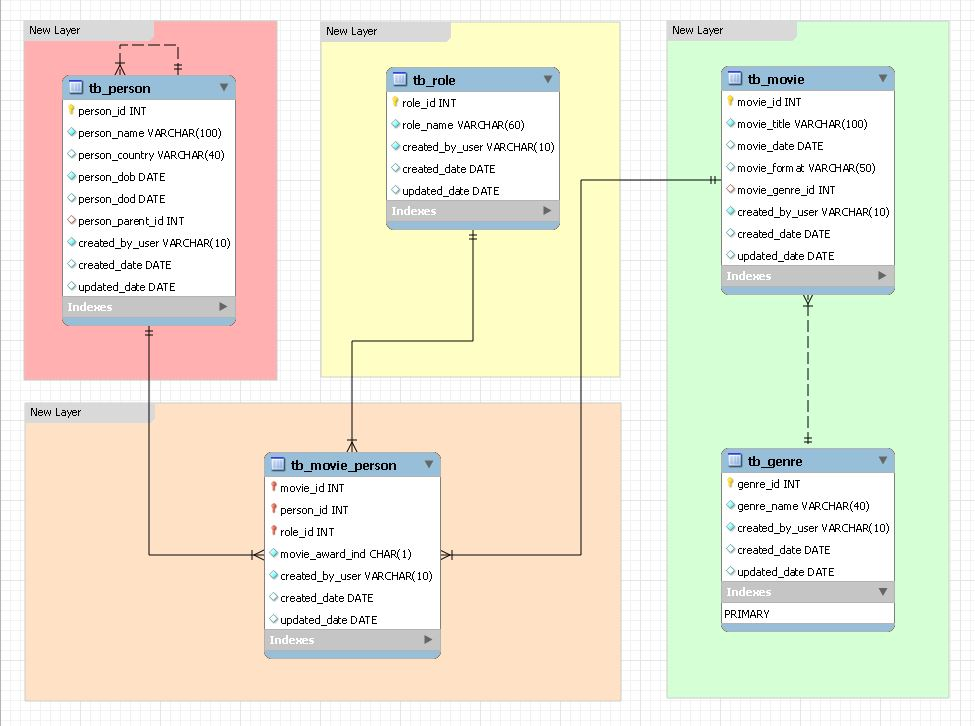

In [2]:
config = {
    'host':"localhost",
    'user':input("Enter username: "),
     'password':getpass("Enter password: "),
        'database':"movies",
}
cnx = connect(**config)
cursor=cnx.cursor(buffered=True)

Enter username: root
Enter password: ········


# Exercici 2

Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir el nom, el país i la data de naixement d'aquelles persones per les quals no consti una data de mort i ordenar les dades de la persona més vella a la persona més jove.

In [5]:
show_db_query = """SELECT person_name, person_country, person_dob
                FROM movies.tb_person 
                WHERE person_dod IS NULL
                ORDER BY person_dob ASC;"""
cursor.execute(show_db_query)

for row in cursor.fetchall():
    print(row)

('John Williams', 'United States', datetime.date(1928, 8, 8))
('Vera Miles', 'United States', datetime.date(1929, 8, 23))
('Sean Connery', 'Scotland', datetime.date(1930, 7, 8))
('Robert Duvall', 'United States', datetime.date(1931, 1, 5))
('Morgan Freeman', 'United States', datetime.date(1935, 10, 1))
('Francis Ford Coppola', 'United States', datetime.date(1939, 4, 7))
('Gary Kurtz', 'United States', datetime.date(1940, 7, 27))
('Martin Sheen', 'United States', datetime.date(1940, 8, 3))
('Harrison Ford', 'United States', datetime.date(1942, 7, 13))
('George Lucas', 'United States', datetime.date(1944, 5, 14))
('Carmine Coppola', 'United States', datetime.date(1945, 7, 8))
('Steven Spielberg', 'United States', datetime.date(1946, 12, 18))
('Tim Robbins', 'United States', datetime.date(1949, 6, 7))
('Mel Gibson', 'Australia', datetime.date(1950, 8, 9))
('Tom Hanks', 'United States', datetime.date(1956, 7, 9))
('Emilio Martinez Lazaro', 'Spain', datetime.date(1956, 9, 9))
('Karra Elejal

# Exercici 3

Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir el nom del gènere i el nombre total de pel·lícules d'aquest gènere i ordenar-ho per ordre descendent de nombre total de pel·lícules.  

In [6]:
query = """SELECT 
                tb_genre.genre_name,
                COUNT(tb_movie.movie_genre_id)
                FROM tb_genre
                JOIN tb_movie
                ON tb_genre.genre_id = tb_movie.movie_genre_id
                GROUP BY genre_name
                ORDER BY COUNT(tb_movie.movie_genre_id) DESC
        ;"""

cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Comedia', 3)
('Acción', 2)
('Ciencia Ficción', 2)
('Drama', 2)
('Romance', 2)
('Suspense', 2)
('Fantasía', 1)
('Terror', 1)
('Bélico', 1)


# Exercici 4

Realitza la següent consulta sobre la base de dades acabada de crear: 

Has d'obtenir, per a cada persona, el seu nom i el nombre màxim de rols diferents que ha tingut en una mateixa pel·lícula. 

Posteriorment, mostra únicament aquelles persones que hagin assumit més d'un rol en una mateixa pel·lícula.

In [7]:
query = """SELECT 
                tb_person.person_name,
                tb_movie.movie_title,
                COUNT(tb_movie_person.role_id)
                FROM tb_movie_person
                JOIN tb_person 
                ON tb_person.person_id = tb_movie_person.person_id
                JOIN tb_movie
                ON tb_movie_person.movie_id = tb_movie.movie_id
                GROUP BY person_name, movie_title
                ORDER BY COUNT(tb_movie_person.role_id) DESC
        ;"""



cursor.execute(query)
for row in cursor.fetchall():
    print(row)

('Francis Ford Coppola', 'Apocalypse Now', 3)
('Alfred Joseph Hitchcock', 'Psycho', 3)
('George Lucas', 'Indiana Jones and the Temple of Doom', 2)
('Steven Spielberg', 'The Terminal', 2)
('Daniel Sanchez Arevalo', 'La Gran Familia Española', 2)
('Mel Gibson', 'Braveheart', 2)
('Robert Duvall', 'Apocalypse Now', 1)
('Martin Sheen', 'Apocalypse Now', 1)
('Harrison Ford', 'Apocalypse Now', 1)
('Charlie Sheen', 'Apocalypse Now', 1)
('Harrison Ford', 'Star Wars:Episode IV - A New Hope', 1)
('George Lucas', 'Star Wars:Episode IV - A New Hope', 1)
('Gary Kurtz', 'Star Wars:Episode IV - A New Hope', 1)
('Harrison Ford', 'Indiana Jones and the Temple of Doom', 1)
('Steven Spielberg', 'Indiana Jones and the Temple of Doom', 1)
('John Williams', 'Indiana Jones and the Temple of Doom', 1)
('Tom Hanks', 'The Terminal', 1)
('Catherine Zeta-Jones', 'The Terminal', 1)
('Steven Spielberg', 'Jaws', 1)
('Steven Spielberg', 'ET The Extraterrestrial', 1)
('Anthony Perkins', 'Psycho', 1)
('Vera Miles', 'Psy

# Exercici 5

Realitza la següent operació sobre la base de dades acabada de crear: 

Has de crear un nou gènere anomenat "Documental" el qual tingui com a identificador el nombre 69.

In [8]:
query = """INSERT INTO tb_genre (
                    genre_id,
                    genre_name
                )
            VALUES (
                    69,
                    'Documental'
                )
        ;"""
cursor.execute(query)

In [9]:
q = """SELECT
            *
        FROM tb_genre
        WHERE genre_id = 69;
    """
cursor.execute(q)
print(cursor.fetchall())

[(69, 'Documental', 'OS_SGAD', None, None)]


# Exercici 6

Fes la següent operació sobre la base de dades acabada de crear:  

Elimina la pel·lícula "La Gran Familia Española" de la base de dades.

>First get the id of the movie, since it's primary and foreign key

In [10]:
query = """SELECT
                tb_movie.movie_id,
                tb_movie.movie_title
            FROM tb_movie
            JOIN tb_movie_person
            ON tb_movie_person.movie_id = tb_movie.movie_id
            WHERE  movie_title = 'La Gran Familia Española';
        """
cursor.execute(query)
print(cursor.fetchone())

(11, 'La Gran Familia Española')


>Second, delete the foreign key in the junction table(Movie_Person) before deleting the Primary key on its parent table (Movie)

In [11]:
q = """ DELETE
        FROM 
            tb_movie_person
        WHERE 
            tb_movie_person.movie_id = 11;
        """
cursor.execute(q)

q = """ DELETE
        FROM 
            tb_movie
        WHERE 
            tb_movie.movie_id = 11;
        """
cursor.execute(q)

>After deleting , we make sure its deleted in both tables by making a search

In [12]:
query = """SELECT
                tb_movie.movie_id,
                tb_movie.movie_title
                FROM tb_movie
                JOIN tb_movie_person
                ON tb_movie_person.movie_id = tb_movie.movie_id
                WHERE  movie_title = 'La Gran Familia Española';
                """
cursor.execute(query)
print(cursor.fetchone())

None


# Exercici 7

Realitza la següent operació sobre la base de dades acabada de crear: 

Canvia el gènere de la pel·lícula "Ocho apellidos catalanes" perquè consti com a comèdia i no com a romàntica.

In [13]:
query = """UPDATE
                tb_movie
            SET movie_genre_id = 3
            WHERE movie_title = 'Ocho apellidos catalanes';
        """
cursor.execute(query)

query = """SELECT 
                *
            FROM tb_movie 
            WHERE movie_title = 'Ocho apellidos catalanes';
        """
                
cursor.execute(query)
print(cursor.fetchone())

(9, 'Ocho Apellidos Catalanes', datetime.date(2016, 6, 9), 'Digital', 3, 'OS_SGAD', None, None)
